#Data Diri

Nama  : Tony wijaya<br/>
Email : tony18t@mahasiwa.pcr.ac.id<br/>
No Hp : +62895615649248<br/>
Kota asal : Duri, Riau <br/>
Pekerjaan : Mahasiswa <br/>
Institusi : Politeknik Caltex Riau

# Load Data 

In [ ]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip

--2021-05-11 17:03:12--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip’

rockpaperscissors.z 100%[===================>] 307.92M   792KB/s    in 4m 26s  

2021-05-11 17:07:39 (1.16 MB/s) - ‘rockpaperscissors.zip’ saved [322873683/322873683]



# Mengektrak file Zip

In [ ]:
import os,zipfile 

local_zip = '/content/rockpaperscissors.zip'  
zip_ref = zipfile.ZipFile(local_zip, 'r')     
zip_ref.extractall('/content/')               
zip_ref.close()                              

# Membagi File

In [ ]:
folder_base = "/content/rockpaperscissors/"
folder_scissor  = os.path.join(folder_base,'scissors')            
folder_rock     = os.path.join(folder_base,'rock')                
folder_paper    = os.path.join(folder_base,'paper')               

print('Jumlah total gambar gunting:', len(os.listdir(folder_scissor)))           
print('Jumlah total gambar batu:'   , len(os.listdir(folder_rock)))              
print('Jumlah total gambar kertas:' , len(os.listdir(folder_paper)))             

file_list_scissor  = os.listdir(folder_scissor)                                 
file_list_rock     = os.listdir(folder_rock)                                     
file_list_paper    = os.listdir(folder_paper)                                    


print("\nMenampilkan nama file gambar:")

import random
def get_random(list, string):
  output = []
  for i in range(5):
      random_index = random.randint(0, len(list)+1)
      output.append(list[random_index]) 
  print(string,output)


get_random(file_list_scissor, "Gunting")                                                                                   
get_random(file_list_rock, "Batu")                                                    
get_random(file_list_paper, "Kertas")                                                                                        

Jumlah total gambar gunting: 750
Jumlah total gambar batu: 726
Jumlah total gambar kertas: 712

Menampilkan nama file gambar:
Gunting ['9ZqjWey4XHP94iRr.png', 'dFlxUAypUgfOZqoV.png', '4X8TOCQTfCWnMfm2.png', 'rPWSuNNi9TZbKb7l.png', 'Mwmjta6k9iqQKKd7.png']
Batu ['84UHPxArtBOr8GF2.png', '7NqXwATGidLt6kZY.png', 'Jr45GnbiZqBa7TLX.png', 'fiivFS9iUjynQIB5.png', 'dLrum1jVnQix8sV5.png']
Kertas ['PwkqvoT0noMITNaF.png', 'W4QtOYoG8ThbcmsY.png', 'PLvidx6rZDuRENbv.png', 'XOWPFbuwpaJaEv9o.png', 'N4D5tleMLbP1Au5D.png']


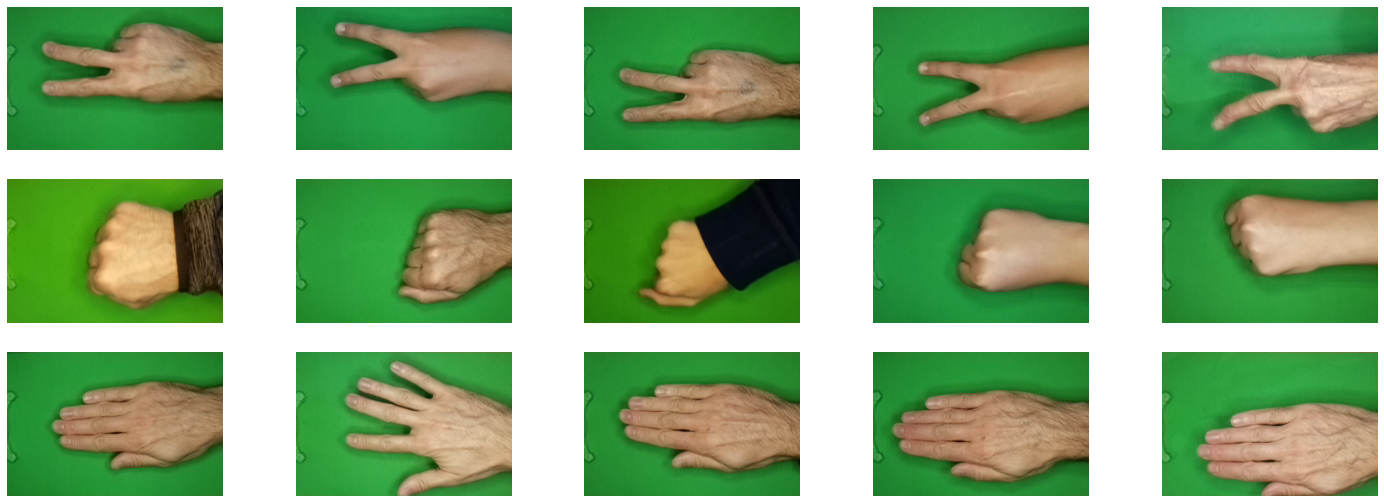

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt                                                  
import matplotlib.image as mpimg

nrows = 3                                                                        
ncols = 5                                                                        

pic_index = 0                                                                    
fig = plt.gcf()
fig.set_size_inches(ncols * 5, nrows * 3)                                        

pic_index += 5                                                                   
gbr_tampil_gunting  = [os.path.join(folder_scissor, fname)                       
                      for fname in file_list_scissor[pic_index-5:pic_index]]
gbr_tampil_batu     = [os.path.join(folder_rock, fname)                          
                      for fname in file_list_rock[pic_index-5:pic_index]]
gbr_tampil_kertas   = [os.path.join(folder_paper, fname)                         
                      for fname in file_list_paper[pic_index-5:pic_index]]

for i, img_path in enumerate(gbr_tampil_gunting+gbr_tampil_batu+gbr_tampil_kertas):
  sp = plt.subplot(nrows, ncols, i + 1)                                           
  sp.axis('Off')                                                                  

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

# Membuat direktori dan split dataset

In [ ]:
folder_train = os.path.join(folder_base,'train')
folder_validation = os.path.join(folder_base, 'val')

os.mkdir(folder_train)
os.mkdir(folder_validation)

In [ ]:
train_rock = os.path.join(folder_train, 'rock')
train_paper = os.path.join(folder_train, 'paper')
train_scissors = os.path.join(folder_train, 'scissors')
val_rock = os.path.join(folder_validation, 'rock')
val_paper = os.path.join(folder_validation, 'paper')
val_scissors = os.path.join(folder_validation, 'scissors')

os.mkdir(train_rock)
os.mkdir(train_paper)
os.mkdir(train_scissors)
os.mkdir(val_rock)
os.mkdir(val_paper)
os.mkdir(val_scissors)

# Pemisahan Data menjadi Training dan Validation

In [ ]:
from sklearn.model_selection import train_test_split
import shutil

train_rock_dir, val_rock_dir = train_test_split(os.listdir(folder_rock ), test_size = 0.40)
train_paper_dir, val_paper_dir = train_test_split(os.listdir(folder_paper), test_size = 0.40)
train_scissors_dir, val_scissors_dir = train_test_split(os.listdir(folder_scissor), test_size = 0.40)

for file in train_rock_dir:
  shutil.copy(os.path.join(folder_rock, file), os.path.join(train_rock, file))
for file in train_paper_dir:
  shutil.copy(os.path.join(folder_paper,file), os.path.join(train_paper,file))
for file in train_scissors_dir:
  shutil.copy(os.path.join(folder_scissor,file), os.path.join(train_scissors,file))
for file in val_rock_dir:
  shutil.copy(os.path.join(folder_rock, file), os.path.join(val_rock,file))
for file in val_paper_dir:
  shutil.copy(os.path.join(folder_paper,file), os.path.join(val_paper,file))
for file in val_scissors_dir:
  shutil.copy(os.path.join(folder_scissor,file), os.path.join(val_scissors,file))

# Melakukan Augmentasi 

In [ ]:
import tensorflow as tf                                                          
import keras_preprocessing                                                        
from keras_preprocessing import image                                             
from keras_preprocessing.image import ImageDataGenerator                          

BASE_DIR = "/content/rockpaperscissors/rps-cv-images/"                            
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest',
)
test_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    vertical_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest'
)

train_generator = train_datagen.flow_from_directory(
    folder_train,
    target_size=(150,150),
    batch_size= 32,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    folder_validation,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


# Membangun Model Artificial Neural Network

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import Model

pre_trained_model = InceptionV3(input_shape = (150, 150, 3),
                                include_top = False,
                                weights = 'imagenet')


for layer in pre_trained_model.layers:
  layer.trainable = False

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dense(3, activation= 'softmax')
])

model.add(pre_trained_model.input)

tb_callback = tf.keras.callbacks.TensorBoard(log_dir=" logs/", histogram_freq=1)

model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy']) 

model.summary()

87916544/87910968 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_94 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_95 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_96 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________

# Melatih Model Artificial Neural Network

In [ ]:
tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/", histogram_freq=1)

# Penggunaan Callback mencegah overfitting dan menghentikan training setelah akurasi terpenuhi
class early_stop(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.97):
      print("\nAkurasi di atas 97%, hentikan training!")
      self.model.stop_training = True

early_stop_callbacks = early_stop()

history=model.fit(
    train_generator,
    steps_per_epoch = 41,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 27, 
    verbose =2,
    callbacks = [tb_callback, early_stop_callbacks]
    )

Epoch 1/20
41/41 - 67s - loss: 1.1621 - accuracy: 0.4390 - val_loss: 0.7937 - val_accuracy: 0.6979
Epoch 2/20
41/41 - 65s - loss: 0.6221 - accuracy: 0.7645 - val_loss: 0.3923 - val_accuracy: 0.8657
Epoch 3/20
41/41 - 65s - loss: 0.3649 - accuracy: 0.8720 - val_loss: 0.2614 - val_accuracy: 0.9155
Epoch 4/20
41/41 - 65s - loss: 0.2647 - accuracy: 0.9009 - val_loss: 0.2851 - val_accuracy: 0.9028
Epoch 5/20
41/41 - 65s - loss: 0.1833 - accuracy: 0.9405 - val_loss: 0.2266 - val_accuracy: 0.9190
Epoch 6/20
41/41 - 65s - loss: 0.1638 - accuracy: 0.9459 - val_loss: 0.1321 - val_accuracy: 0.9549
Epoch 7/20
41/41 - 65s - loss: 0.1266 - accuracy: 0.9527 - val_loss: 0.1400 - val_accuracy: 0.9514
Epoch 8/20
41/41 - 65s - loss: 0.0863 - accuracy: 0.9649 - val_loss: 0.0920 - val_accuracy: 0.9757
Epoch 9/20
41/41 - 65s - loss: 0.1072 - accuracy: 0.9627 - val_loss: 0.0636 - val_accuracy: 0.9769
Epoch 10/20
41/41 - 65s - loss: 0.0934 - accuracy: 0.9665 - val_loss: 0.0841 - val_accuracy: 0.9734
Epoch 11/

In [ ]:
%load_ext tensorboard
%tensorboard --logdir logs/

<IPython.core.display.Javascript object>

# Uji Coba Model Klasifikasi Gambar Tangan Gunting, Batu, Kertas

Saving JULz0bpEBDkoMfh4.png to JULz0bpEBDkoMfh4 (1).png
JULz0bpEBDkoMfh4.png
scissors


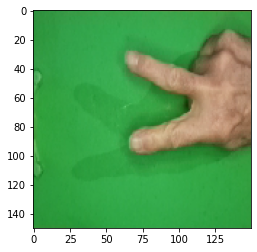

Saving 4VYEe9NSyMlJmXUx.png to 4VYEe9NSyMlJmXUx (1).png
4VYEe9NSyMlJmXUx.png
rock


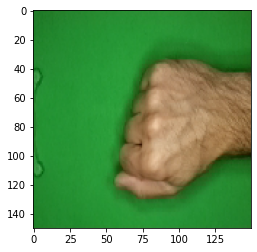

Saving 1Tt9U9SzrOm98Xtw.png to 1Tt9U9SzrOm98Xtw (1).png
1Tt9U9SzrOm98Xtw.png
paper


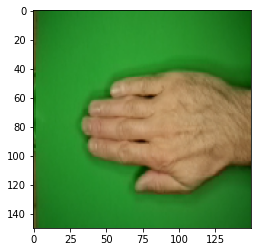

In [14]:
import numpy as np                                                                
from google.colab import files                                                    
from keras.preprocessing import image                                             

                                                      

def check_file(uploaded):
  for fn in uploaded.keys():

    path = fn
    img = image.load_img(path, target_size=(150, 150))                              
    imgplot = plt.imshow(img)                                                       
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    print(fn)
    if classes[0][0]==1:
      print("paper")
    elif classes[0][1]==1:
      print("rock")
    elif classes[0][2]==1:
      print("scissors")
    else :
      print("Undefined")    
    plt.show(img)    
      
for i in range(3):
  uploaded = files.upload()   
  check_file(uploaded)    
                                             